In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("AmesHousing.csv", sep='\t')
pd.options.future.infer_string = True
print(df.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   str    
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   str    
 7   Alley            198 non-null    str    
 8   Lot Shape        2930 non-null   str    
 9   Land Contour     2930 non-null   str    
 10  Utilities        2930 non-null   str    
 11  Lot Config       2930 non-null   str    
 12  Land Slope       2930 non-null   str    
 13  Neighborhood     2930 non-null   str    
 14  Condition 1      2930 non-null   str    
 15  Condition 2      2930 non-null   str    
 16  Bldg Type        2930 non-null   str    
 17  House Style   

In [122]:
df.dtypes.value_counts()

str        43
int64      28
float64    11
Name: count, dtype: int64

In [123]:
df.duplicated().any()

np.False_

In [124]:
# check number of missing values per feature
missing = df.isnull().sum().sort_values(ascending=False).head(30)
print(missing)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Yr Blt      159
Garage Cond        159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
Total Bsmt SF        1
BsmtFin SF 1         1
BsmtFin SF 2         1
Garage Area          1
Garage Cars          1
Bsmt Unf SF          1
Electrical           1
Lot Shape            0
Street               0
Lot Area             0
dtype: int64


In [125]:
print(df.columns)

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [126]:
df.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning             str
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type             str
Sale Condition        str
SalePrice           int64
Length: 82, dtype: object

In [127]:
df.select_dtypes(include='object').columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='str')

In [128]:
df.select_dtypes(include='int64').columns

Index(['Order', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold',
       'Yr Sold', 'SalePrice'],
      dtype='str')

In [129]:
df.select_dtypes(include='float64').columns

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
      dtype='str')

 NA values in categorical columns that actually mean 'No <feature>'

 'Alley','Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2','Fireplace Qu','Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond','Pool QC', 'Fence', 'Misc Feature'

In [130]:
df['Alley'] = df['Alley'].replace('NA', 'NoAlley').fillna('NoAlley')
df['Alley'].isna().sum()
df['Alley'].value_counts(dropna=False)

Alley
NoAlley    2732
Grvl        120
Pave         78
Name: count, dtype: int64

In [131]:
df['Bsmt Qual'] = df['Bsmt Qual'].replace('NA', 'NoBasement').fillna('NoBasement')
df['Bsmt Qual'].isna().sum()
df['Bsmt Qual'].value_counts(dropna=False)

Bsmt Qual
TA            1283
Gd            1219
Ex             258
Fa              88
NoBasement      80
Po               2
Name: count, dtype: int64

In [132]:
df['Bsmt Cond'] = df['Bsmt Cond'].replace('NA', 'NoBasement').fillna('NoBasement')
df['Bsmt Cond'].isna().sum()
df['Bsmt Cond'].value_counts(dropna=False)

Bsmt Cond
TA            2616
Gd             122
Fa             104
NoBasement      80
Po               5
Ex               3
Name: count, dtype: int64

In [133]:
df['Bsmt Exposure'] = df['Bsmt Exposure'].replace('NA', 'NoBasement').fillna('NoBasement')
df['Bsmt Exposure'].isna().sum()
df['Bsmt Exposure'].value_counts(dropna=False)

Bsmt Exposure
No            1906
Av             418
Gd             284
Mn             239
NoBasement      83
Name: count, dtype: int64

In [134]:
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].replace('NA', 'NoBasement').fillna('NoBasement')
df['BsmtFin Type 1'].isna().sum()
df['BsmtFin Type 1'].value_counts(dropna=False)

BsmtFin Type 1
GLQ           859
Unf           851
ALQ           429
Rec           288
BLQ           269
LwQ           154
NoBasement     80
Name: count, dtype: int64

In [135]:
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].replace('NA', 'NoBasement').fillna('NoBasement')
df['BsmtFin Type 2'].isna().sum()
df['BsmtFin Type 2'].value_counts(dropna=False)

BsmtFin Type 2
Unf           2499
Rec            106
LwQ             89
NoBasement      81
BLQ             68
ALQ             53
GLQ             34
Name: count, dtype: int64

In [136]:
df['Fireplace Qu'] = df['Fireplace Qu'].replace('NA', 'NoFireplace').fillna('NoFireplace')
df['Fireplace Qu'].isna().sum()
df['Fireplace Qu'].value_counts(dropna=False)

Fireplace Qu
NoFireplace    1422
Gd              744
TA              600
Fa               75
Po               46
Ex               43
Name: count, dtype: int64

In [137]:
df['Garage Type'] = df['Garage Type'].replace('NA', 'NoGarage').fillna('NoGarage')
df['Garage Type'].isna().sum()
df['Garage Type'].value_counts(dropna=False)

Garage Type
Attchd      1731
Detchd       782
BuiltIn      186
NoGarage     157
Basment       36
2Types        23
CarPort       15
Name: count, dtype: int64

In [138]:
df['Garage Finish'] = df['Garage Finish'].replace('NA', 'NoGarage').fillna('NoGarage')
df['Garage Finish'].isna().sum()
df['Garage Finish'].value_counts(dropna=False)

Garage Finish
Unf         1231
RFn          812
Fin          728
NoGarage     159
Name: count, dtype: int64

In [139]:
df['Garage Qual'] = df['Garage Qual'].replace('NA', 'NoGarage').fillna('NoGarage')
df['Garage Qual'].isna().sum()
df['Garage Qual'].value_counts(dropna=False)

Garage Qual
TA          2615
NoGarage     159
Fa           124
Gd            24
Po             5
Ex             3
Name: count, dtype: int64

In [140]:
df['Garage Cond'] = df['Garage Cond'].replace('NA', 'NoGarage').fillna('NoGarage')
df['Garage Cond'].isna().sum()
df['Garage Cond'].value_counts(dropna=False)

Garage Cond
TA          2665
NoGarage     159
Fa            74
Gd            15
Po            14
Ex             3
Name: count, dtype: int64

In [141]:
df['Pool QC'] = df['Pool QC'].replace('NA', 'NoPool').fillna('NoPool')
df['Pool QC'].isna().sum()
df['Pool QC'].value_counts(dropna=False)

Pool QC
NoPool    2917
Ex           4
Gd           4
TA           3
Fa           2
Name: count, dtype: int64

In [142]:
df['Fence'] = df['Fence'].replace('NA', 'NoFence').fillna('NoFence')
df['Fence'].isna().sum()
df['Fence'].value_counts(dropna=False)

Fence
NoFence    2358
MnPrv       330
GdPrv       118
GdWo        112
MnWw         12
Name: count, dtype: int64

In [143]:
df['Misc Feature'] = df['Misc Feature'].replace('NA', 'NoFeature').fillna('NoFeature')
df['Misc Feature'].isna().sum()
df['Misc Feature'].value_counts(dropna=False)

Misc Feature
NoFeature    2824
Shed           95
Gar2            5
Othr            4
Elev            1
TenC            1
Name: count, dtype: int64

In [144]:
for col in df.columns:
    print(f"\n=== {col} ===")
    print((df[col].value_counts(normalize=True, dropna=False) * 100).round(2))


=== Order ===
Order
1       0.03
2       0.03
3       0.03
4       0.03
5       0.03
        ... 
2926    0.03
2927    0.03
2928    0.03
2929    0.03
2930    0.03
Name: proportion, Length: 2930, dtype: float64

=== PID ===
PID
526301100    0.03
526350040    0.03
526351010    0.03
526353030    0.03
527105010    0.03
             ... 
923275080    0.03
923276100    0.03
923400125    0.03
924100070    0.03
924151050    0.03
Name: proportion, Length: 2930, dtype: float64

=== MS SubClass ===
MS SubClass
20     36.83
60     19.62
50      9.80
120     6.55
30      4.74
160     4.40
70      4.37
80      4.03
90      3.72
190     2.08
85      1.64
75      0.78
45      0.61
180     0.58
40      0.20
150     0.03
Name: proportion, dtype: float64

=== MS Zoning ===
MS Zoning
RL         77.58
RM         15.77
FV          4.74
RH          0.92
C (all)     0.85
I (all)     0.07
A (agr)     0.07
Name: proportion, dtype: float64

=== Lot Frontage ===
Lot Frontage
NaN      16.72
60.0      9.42
80.0   

In [145]:
# Basement: says NoBasement but areas > 0
mask_no_bsmt = (df['Bsmt Qual'] == 'NoBasement') | (df['Bsmt Cond'] == 'NoBasement') | (df['Bsmt Exposure'] == 'NoBasement')
err_bsmt_area = df[ mask_no_bsmt & (df[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']].fillna(0).sum(axis=1) > 0) ]
print("\n[Basement] 'NoBasement' but areas > 0:", len(err_bsmt_area))
print(err_bsmt_area[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Qual','Bsmt Cond','Bsmt Exposure']].head())


[Basement] 'NoBasement' but areas > 0: 3
      BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Bsmt Qual  \
66             0.0           0.0       1595.0         1595.0        Gd   
1796           0.0           0.0        725.0          725.0        Gd   
2779           0.0           0.0        936.0          936.0        Gd   

     Bsmt Cond Bsmt Exposure  
66          TA    NoBasement  
1796        TA    NoBasement  
2779        TA    NoBasement  


In [146]:
#todo FLAG solve

has_bsmt = (df[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']].fillna(0).sum(axis=1) > 0)
bad_expo = has_bsmt & (df['Bsmt Exposure'] == 'NoBasement')

df['Fix_BsmtExposure'] = 0
df.loc[bad_expo, 'Bsmt Exposure'] = 'No'
df.loc[bad_expo, 'Fix_BsmtExposure'] = 1


In [147]:
# Basement: baths > 0 while NoBasement
err_bsmt_baths = df[ mask_no_bsmt & ((df['Bsmt Full Bath'].fillna(0) > 0) | (df['Bsmt Half Bath'].fillna(0) > 0)) ]
print("\n[Basement] Baths > 0 while 'NoBasement':", len(err_bsmt_baths))
print(err_bsmt_baths[['Bsmt Full Bath','Bsmt Half Bath','Bsmt Qual']].head())


[Basement] Baths > 0 while 'NoBasement': 0
Empty DataFrame
Columns: [Bsmt Full Bath, Bsmt Half Bath, Bsmt Qual]
Index: []


In [148]:
# Fireplace: 0 but quality set (not 'NoFireplace')
err_fire_set = df[(df['Fireplaces'].fillna(0) == 0) & (df['Fireplace Qu'].notna()) & (df['Fireplace Qu'] != 'NoFireplace')]
print("\n[Fireplace] Fireplaces == 0 but quality set:", len(err_fire_set))
print(err_fire_set[['Fireplaces','Fireplace Qu']].head())



[Fireplace] Fireplaces == 0 but quality set: 0
Empty DataFrame
Columns: [Fireplaces, Fireplace Qu]
Index: []


In [149]:
# Fireplace: >0 but quality missing or 'NoFireplace'
err_fire_missing = df[(df['Fireplaces'].fillna(0) > 0) & (df['Fireplace Qu'].isna() | (df['Fireplace Qu'] == 'NoFireplace'))]
print("\n[Fireplace] >0 but quality missing/'NoFireplace':", len(err_fire_missing))
print(err_fire_missing[['Fireplaces','Fireplace Qu']].head())


[Fireplace] >0 but quality missing/'NoFireplace': 0
Empty DataFrame
Columns: [Fireplaces, Fireplace Qu]
Index: []


In [150]:
# Garage: says NoGarage but has info
g_no = (df['Garage Type'] == 'NoGarage')
err_gar_absent = df[g_no & ((df['Garage Area'].fillna(0) > 0) | (df['Garage Cars'].fillna(0) > 0) |
                            (df['Garage Finish'] != 'NoGarage') | (df['Garage Qual'] != 'NoGarage') | (df['Garage Cond'] != 'NoGarage'))]
print("\n[Garage] 'NoGarage' but has info:", len(err_gar_absent))
print(err_gar_absent[['Garage Type','Garage Area','Garage Cars','Garage Finish','Garage Qual','Garage Cond']].head())


[Garage] 'NoGarage' but has info: 0
Empty DataFrame
Columns: [Garage Type, Garage Area, Garage Cars, Garage Finish, Garage Qual, Garage Cond]
Index: []


In [151]:
# Garage: has garage but labels are 'NoGarage'
g_has = (df['Garage Type'] != 'NoGarage') | (df['Garage Area'].fillna(0) > 0) | (df['Garage Cars'].fillna(0) > 0)
err_gar_present = df[g_has & ((df['Garage Finish'] == 'NoGarage') | (df['Garage Qual'] == 'NoGarage') | (df['Garage Cond'] == 'NoGarage'))]
print("\n[Garage] Has garage but labels 'NoGarage':", len(err_gar_present))
print(err_gar_present[['Garage Type','Garage Area','Garage Cars','Garage Finish','Garage Qual','Garage Cond']].head())


[Garage] Has garage but labels 'NoGarage': 2
     Garage Type  Garage Area  Garage Cars Garage Finish Garage Qual  \
1356      Detchd        360.0          1.0      NoGarage    NoGarage   
2236      Detchd          NaN          NaN      NoGarage    NoGarage   

     Garage Cond  
1356    NoGarage  
2236    NoGarage  


In [152]:
# todo FLAG solve
# 1) rânduri care clar au garaj
g_has = (df['Garage Type'] != 'NoGarage') | (df['Garage Area'].fillna(0) > 0) | (df['Garage Cars'].fillna(0) > 0)

# 2) modă per tip pentru etichete
def mode1(s):
    m = s.mode(dropna=True)
    return m.iloc[0] if not m.empty else None

modes = (
    df[g_has]
    .groupby('Garage Type')[['Garage Finish','Garage Qual','Garage Cond']]
    .agg(mode1)
)

# 3) mediană per tip pentru numerice
med_area = df[g_has].groupby('Garage Type')['Garage Area'].median()
med_cars = df[g_has].groupby('Garage Type')['Garage Cars'].median()

# flag pentru audit
df['Fix_Garage'] = 0

# 4) corectează etichetele 'NoGarage' acolo unde există garaj
to_fix_labels = g_has & (
    (df['Garage Finish'] == 'NoGarage') |
    (df['Garage Qual']   == 'NoGarage') |
    (df['Garage Cond']   == 'NoGarage')
)

for col in ['Garage Finish','Garage Qual','Garage Cond']:
    fill_vals = df.loc[to_fix_labels, 'Garage Type'].map(modes[col])
    need = to_fix_labels & ((df[col] == 'NoGarage') | df[col].isna())
    df.loc[need, col] = fill_vals[need]
    df.loc[need, 'Fix_Garage'] = 1

# 5) completează lipsurile numerice cu mediană per tip
miss_area = g_has & df['Garage Area'].isna()
df.loc[miss_area, 'Garage Area'] = df.loc[miss_area, 'Garage Type'].map(med_area)
df.loc[miss_area, 'Fix_Garage'] = 1

miss_cars = g_has & df['Garage Cars'].isna()
df.loc[miss_cars, 'Garage Cars'] = df.loc[miss_cars, 'Garage Type'].map(med_cars)
df.loc[miss_cars, 'Fix_Garage'] = 1

# 6) revalidare rapidă
err_after = g_has & (
    (df['Garage Finish'] == 'NoGarage') |
    (df['Garage Qual']   == 'NoGarage') |
    (df['Garage Cond']   == 'NoGarage')
)
print("Remaining garage inconsistencies:", err_after.sum())

print(df.loc[[1356,2236], ['Garage Type','Garage Area','Garage Cars',
                           'Garage Finish','Garage Qual','Garage Cond','Fix_Garage']])


Remaining garage inconsistencies: 0
     Garage Type  Garage Area  Garage Cars Garage Finish Garage Qual  \
1356      Detchd        360.0          1.0           Unf          TA   
2236      Detchd        400.0          2.0           Unf          TA   

     Garage Cond  Fix_Garage  
1356          TA           1  
2236          TA           1  


In [153]:
# Pool: area == 0 but QC set (not 'NoPool')
err_pool_set = df[(df['Pool Area'].fillna(0) == 0) & (df['Pool QC'].notna()) & (df['Pool QC'] != 'NoPool')]
print("\n[Pool] Area == 0 but QC set:", len(err_pool_set))
print(err_pool_set[['Pool Area','Pool QC']].head())


[Pool] Area == 0 but QC set: 0
Empty DataFrame
Columns: [Pool Area, Pool QC]
Index: []


In [154]:
# Pool: area > 0 but QC missing or 'NoPool'
err_pool_missing = df[(df['Pool Area'].fillna(0) > 0) & (df['Pool QC'].isna() | (df['Pool QC'] == 'NoPool'))]
print("\n[Pool] Area > 0 but QC missing/'NoPool':", len(err_pool_missing))
print(err_pool_missing[['Pool Area','Pool QC']].head())


[Pool] Area > 0 but QC missing/'NoPool': 0
Empty DataFrame
Columns: [Pool Area, Pool QC]
Index: []


In [155]:
# Alley: invalid values (expect only NoAlley/Grvl/Pave)
err_alley = df[(df['Alley'].notna()) & (~df['Alley'].isin(['NoAlley','Grvl','Pave']))]
print("\n[Alley] Invalid values:", len(err_alley))
print(err_alley[['Alley']].head())


[Alley] Invalid values: 0
Empty DataFrame
Columns: [Alley]
Index: []


In [156]:
# NoGarage but 'Garage Yr Blt' set
err_gar_year_abs = df[(df['Garage Type'] == 'NoGarage') & (df['Garage Yr Blt'].notna())]
print("\n[Garage] NoGarage but 'Garage Yr Blt' set:", len(err_gar_year_abs))
print(err_gar_year_abs[['Garage Type','Garage Yr Blt']].head())


[Garage] NoGarage but 'Garage Yr Blt' set: 0
Empty DataFrame
Columns: [Garage Type, Garage Yr Blt]
Index: []


In [157]:
# ===== 2) DUPLICATES =====

dups_pid = df[df['PID'].duplicated(keep=False)].sort_values('PID')
print("\n[Duplicates] PID duplicated rows:", len(dups_pid))
print(dups_pid[['PID']].head())


[Duplicates] PID duplicated rows: 0
Empty DataFrame
Columns: [PID]
Index: []


In [158]:
dups_order = df[df['Order'].duplicated(keep=False)]
print("\n[Duplicates] Order duplicated rows:", len(dups_order))
print(dups_order[['Order']].head())



[Duplicates] Order duplicated rows: 0
Empty DataFrame
Columns: [Order]
Index: []


In [159]:
# Total basement should equal sum of parts
err_total_bsmt = df[df['Total Bsmt SF'] != (df['BsmtFin SF 1'].fillna(0) + df['BsmtFin SF 2'].fillna(0) + df['Bsmt Unf SF'].fillna(0))]
print("\n[Arithmetic] Total Bsmt SF != sum(parts):", len(err_total_bsmt))
print(err_total_bsmt[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']].head())



[Arithmetic] Total Bsmt SF != sum(parts): 1
      BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF
1341           NaN           NaN          NaN            NaN


In [160]:
parts = ['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF']
total = 'Total Bsmt SF'

# helper series
sum_parts = df[parts].fillna(0).sum(axis=1)
all_parts_na = df[parts].isna().all(axis=1)
total_na = df[total].isna()

# 1) True mismatch: both sides present but unequal
mask_true_mismatch = (~all_parts_na) & (~total_na) & (df[total] != sum_parts)

# 2) Total missing but parts present -> compute total
mask_total_missing = (~all_parts_na) & (total_na)

# 3) Parts all missing but total present -> set parts to 0
mask_parts_missing = (all_parts_na) & (~total_na)

# 4) All missing (parts and total)
mask_all_missing = (all_parts_na) & (total_na)

# Optional: detect "no basement" via label
has_bsmt_label = df['Bsmt Qual'].fillna('NoBasement') != 'NoBasement'
mask_no_bsmt = ~has_bsmt_label  # True = NoBasement

print("[Before] true mismatch:", mask_true_mismatch.sum())
print("[Before] total missing (parts exist):", mask_total_missing.sum())
print("[Before] parts missing (total exists):", mask_parts_missing.sum())
print("[Before] all missing:", mask_all_missing.sum())

# --- FIXES ---

# A) True mismatch -> trust arithmetic: set total = sum(parts)
df.loc[mask_true_mismatch, total] = sum_parts[mask_true_mismatch]

# B) Total missing but parts exist -> set total = sum(parts)
df.loc[mask_total_missing, total] = sum_parts[mask_total_missing]

# C) Parts missing but total exists -> set parts to 0 (so identity holds)
for c in parts:
    df.loc[mask_parts_missing, c] = df.loc[mask_parts_missing, c].fillna(0)

# D) All missing -> if labeled NoBasement, set everything to 0; else leave NaN (to impute later)
to_zero = mask_all_missing & mask_no_bsmt
for c in parts + [total]:
    df.loc[to_zero, c] = 0  # keep NaN for the others (with basement) to impute later

# --- CHECK AGAIN ---
sum_parts_after = df[parts].fillna(0).sum(axis=1)
bad_after = df[total].fillna(-1) != sum_parts_after.fillna(-1)  # align NaNs for comparison

print("[After] remaining mismatches:", bad_after.sum())

# Optionally show the row you saw before (e.g., 1341) to confirm
# print(df.loc[[1341], parts + [total]])


[Before] true mismatch: 0
[Before] total missing (parts exist): 0
[Before] parts missing (total exists): 0
[Before] all missing: 1
[After] remaining mismatches: 0


In [161]:
# Gr Liv Area >= 1st + 2nd floor
err_gr = df[df['Gr Liv Area'] < (df['1st Flr SF'].fillna(0) + df['2nd Flr SF'].fillna(0))]
print("\n[Arithmetic] Gr Liv Area < 1st + 2nd:", len(err_gr))
print(err_gr[['Gr Liv Area','1st Flr SF','2nd Flr SF']].head())


[Arithmetic] Gr Liv Area < 1st + 2nd: 0
Empty DataFrame
Columns: [Gr Liv Area, 1st Flr SF, 2nd Flr SF]
Index: []


In [162]:
# Garage capacity coherence (area vs cars)
err_gar_cap = df[((df['Garage Cars'].fillna(0) > 0) & (df['Garage Area'].fillna(0) == 0)) |
                 ((df['Garage Area'].fillna(0) > 0) & (df['Garage Cars'].fillna(0) == 0))]
print("\n[Arithmetic] Garage capacity mismatch (Cars vs Area):", len(err_gar_cap))
print(err_gar_cap[['Garage Cars','Garage Area']].head())


[Arithmetic] Garage capacity mismatch (Cars vs Area): 0
Empty DataFrame
Columns: [Garage Cars, Garage Area]
Index: []


In [163]:
# Masonry veneer: type vs area
err_mas = df[((df['Mas Vnr Type'] == 'None') & (df['Mas Vnr Area'].fillna(0) > 0)) |
             ((df['Mas Vnr Type'] != 'None') & (df['Mas Vnr Area'].fillna(0) == 0))]
print("\n[Arithmetic] Masonry veneer inconsistent:", len(err_mas))
print(err_mas[['Mas Vnr Type','Mas Vnr Area']].head())


[Arithmetic] Masonry veneer inconsistent: 1771
  Mas Vnr Type  Mas Vnr Area
1          NaN           0.0
3          NaN           0.0
4          NaN           0.0
6          NaN           0.0
7          NaN           0.0


In [164]:
#todo FLAG solve

# 1) Quick masks
area = df['Mas Vnr Area']
typ  = df['Mas Vnr Type']

m_area0        = area.fillna(0) == 0
m_area_pos     = area.fillna(0) > 0
m_type_none    = typ == 'None'
m_type_na      = typ.isna()
m_type_notnone = ~(m_type_none | m_type_na)

# 2) See the four meaningful cases
print("A) type=='None' & area>0:", (m_type_none & m_area_pos).sum())
print("B) type not None & area==0:", (m_type_notnone & m_area0).sum())
print("C) type is NaN & area==0:", (m_type_na & m_area0).sum())
print("D) type is NaN & area>0:", (m_type_na & m_area_pos).sum())

# 3) Fixes

# C) Missing type but area is 0 => it's actually 'None'
fix_C = m_type_na & m_area0
df.loc[fix_C, 'Mas Vnr Type'] = 'None'

# B) Type given but area is 0 => make it consistent with "no veneer"
fix_B = m_type_notnone & m_area0
df.loc[fix_B, 'Mas Vnr Type'] = 'None'

# A) Type 'None' but area > 0 => we need a real type (impute by Neighborhood mode; fallback global)
def mode1(s):
    m = s.mode(dropna=True)
    return m.iloc[0] if not m.empty else None

if 'Neighborhood' in df.columns:
    nb_mode = (df[m_area_pos & ~m_type_none & ~m_type_na]  # rows with veneer & known type
               .groupby('Neighborhood')['Mas Vnr Type']
               .agg(mode1))
else:
    nb_mode = pd.Series(dtype=object)

global_mode = mode1(df['Mas Vnr Type'].dropna())

fix_A = m_type_none & m_area_pos
if 'Neighborhood' in df.columns:
    guess = df.loc[fix_A, 'Neighborhood'].map(nb_mode).fillna(global_mode)
else:
    guess = pd.Series(global_mode, index=df.index[fix_A])
df.loc[fix_A, 'Mas Vnr Type'] = guess

# D) Type is NaN but area > 0 => also impute a real type the same way
fix_D = m_type_na & m_area_pos
if 'Neighborhood' in df.columns:
    guess2 = df.loc[fix_D, 'Neighborhood'].map(nb_mode).fillna(global_mode)
else:
    guess2 = pd.Series(global_mode, index=df.index[fix_D])
df.loc[fix_D, 'Mas Vnr Type'] = guess2

# 4) Re-check inconsistency
err_mas_after = df[((df['Mas Vnr Type'] == 'None') & (df['Mas Vnr Area'].fillna(0) > 0)) |
                   ((df['Mas Vnr Type'] != 'None') & (df['Mas Vnr Area'].fillna(0) == 0))]
print("\n[After] Masonry veneer inconsistent:", len(err_mas_after))


A) type=='None' & area>0: 0
B) type not None & area==0: 3
C) type is NaN & area==0: 1768
D) type is NaN & area>0: 7

[After] Masonry veneer inconsistent: 0


In [165]:
# Rooms: TotRms AbvGrd >= Bedroom AbvGr + Kitchen AbvGr
err_rooms = df[df['TotRms AbvGrd'] < (df['Bedroom AbvGr'].fillna(0) + df['Kitchen AbvGr'].fillna(0))]
print("\n[Arithmetic] TotRms < Bedroom + Kitchen:", len(err_rooms))
print(err_rooms[['TotRms AbvGrd','Bedroom AbvGr','Kitchen AbvGr']].head())



[Arithmetic] TotRms < Bedroom + Kitchen: 0
Empty DataFrame
Columns: [TotRms AbvGrd, Bedroom AbvGr, Kitchen AbvGr]
Index: []


In [166]:
# Rooms: TotRms AbvGrd >= Bedroom AbvGr + Kitchen AbvGr
err_rooms = df[df['TotRms AbvGrd'] < (df['Bedroom AbvGr'].fillna(0) + df['Kitchen AbvGr'].fillna(0))]
print("\n[Arithmetic] TotRms < Bedroom + Kitchen:", len(err_rooms))
print(err_rooms[['TotRms AbvGrd','Bedroom AbvGr','Kitchen AbvGr']].head())




[Arithmetic] TotRms < Bedroom + Kitchen: 0
Empty DataFrame
Columns: [TotRms AbvGrd, Bedroom AbvGr, Kitchen AbvGr]
Index: []


In [167]:
# ===== 4) DOMAIN / RANGE CHECKS =====

bad_month = df[~df['Mo Sold'].between(1, 12)]
print("\n[Range] Bad month (Mo Sold not in 1..12):", len(bad_month))
print(bad_month[['Mo Sold','Yr Sold']].head())


[Range] Bad month (Mo Sold not in 1..12): 0
Empty DataFrame
Columns: [Mo Sold, Yr Sold]
Index: []


In [168]:
neg_cols = ['Lot Frontage','Lot Area','Mas Vnr Area','Gr Liv Area','1st Flr SF','2nd Flr SF','Total Bsmt SF','Garage Area','Pool Area','Misc Val']
negatives = df[(df[neg_cols].fillna(0) < 0).any(axis=1)]
print("\n[Range] Negative metrics found:", len(negatives))
print(negatives[neg_cols].head())



[Range] Negative metrics found: 0
Empty DataFrame
Columns: [Lot Frontage, Lot Area, Mas Vnr Area, Gr Liv Area, 1st Flr SF, 2nd Flr SF, Total Bsmt SF, Garage Area, Pool Area, Misc Val]
Index: []


In [169]:
# ===== 5) TIME / CHRONOLOGY =====

# Yr Sold should be >= Year Built and >= Year Remod/Add
err_years = df[(df['Yr Sold'] < df['Year Built']) | (df['Yr Sold'] < df['Year Remod/Add'])]
print("\n[Time] Yr Sold < Year Built or < Year Remod/Add:", len(err_years))
print(err_years[['Yr Sold','Year Built','Year Remod/Add']].head())


[Time] Yr Sold < Year Built or < Year Remod/Add: 3
      Yr Sold  Year Built  Year Remod/Add
1702     2007        2007            2008
2180     2007        2008            2009
2181     2007        2007            2008


In [170]:
# todo FLAG solve

df = df[(df['Yr Sold'] >= df['Year Built']) & (df['Yr Sold'] >= df['Year Remod/Add'])].copy()


In [171]:
# Year Remod/Add should not be < Year Built
err_remod_before_built = df[df['Year Remod/Add'] < df['Year Built']]
print("\n[Time] Year Remod/Add < Year Built:", len(err_remod_before_built))
print(err_remod_before_built[['Year Built','Year Remod/Add']].head())



[Time] Year Remod/Add < Year Built: 1
     Year Built  Year Remod/Add
850        2002            2001


In [172]:
df = df[df['Year Remod/Add'] >= df['Year Built']].copy()

In [173]:
# Garage year out-of-range vs sale (simple heuristic)
err_gar_year_out = df[(df['Garage Yr Blt'].notna()) & ((df['Garage Yr Blt'] < 1880) | (df['Garage Yr Blt'] > df['Yr Sold'] + 1))]
print("\n[Time] Garage Yr Blt out of plausible range vs sale:", len(err_gar_year_out))
print(err_gar_year_out[['Garage Yr Blt','Yr Sold']].head())


[Time] Garage Yr Blt out of plausible range vs sale: 1
      Garage Yr Blt  Yr Sold
2260         2207.0     2007


In [174]:
df = df[~(df['Garage Yr Blt'].notna() & ((df['Garage Yr Blt'] < 1880) | (df['Garage Yr Blt'] > df['Yr Sold'] + 1)))].copy()

In [175]:
# Invalid sold date (Mo/Yr)
sold_date = pd.to_datetime(dict(year=df['Yr Sold'], month=df['Mo Sold'], day=1), errors='coerce')
bad_sold_date = df[sold_date.isna()]
print("\n[Time] Bad sold date (invalid Mo/Yr):", len(bad_sold_date))
print(bad_sold_date[['Mo Sold','Yr Sold']].head())


[Time] Bad sold date (invalid Mo/Yr): 0
Empty DataFrame
Columns: [Mo Sold, Yr Sold]
Index: []


In [176]:
# ===== 6) CATEGORY VALIDATION =====

expected_bsmtqual = {'NoBasement','Po','Fa','TA','Gd','Ex'}
unexpected_bsmtqual = set(df['Bsmt Qual'].dropna().unique()) - expected_bsmtqual
print("\n[Category] Unexpected Bsmt Qual values:", sorted(unexpected_bsmtqual))


[Category] Unexpected Bsmt Qual values: []


In [177]:
# ===== 7) OUTLIERS (simple sanity) =====
#todo IMPORTANT
q99_gr = df['Gr Liv Area'].quantile(0.99)
suspect_gr = df[df['Gr Liv Area'] > q99_gr]
print("\n[Outliers] Gr Liv Area > 99th percentile:", len(suspect_gr))
print(suspect_gr[['Gr Liv Area']].head())


[Outliers] Gr Liv Area > 99th percentile: 29
     Gr Liv Area
15          3279
65          3238
160         2978
253         3222
422         3140


Relevant Plots

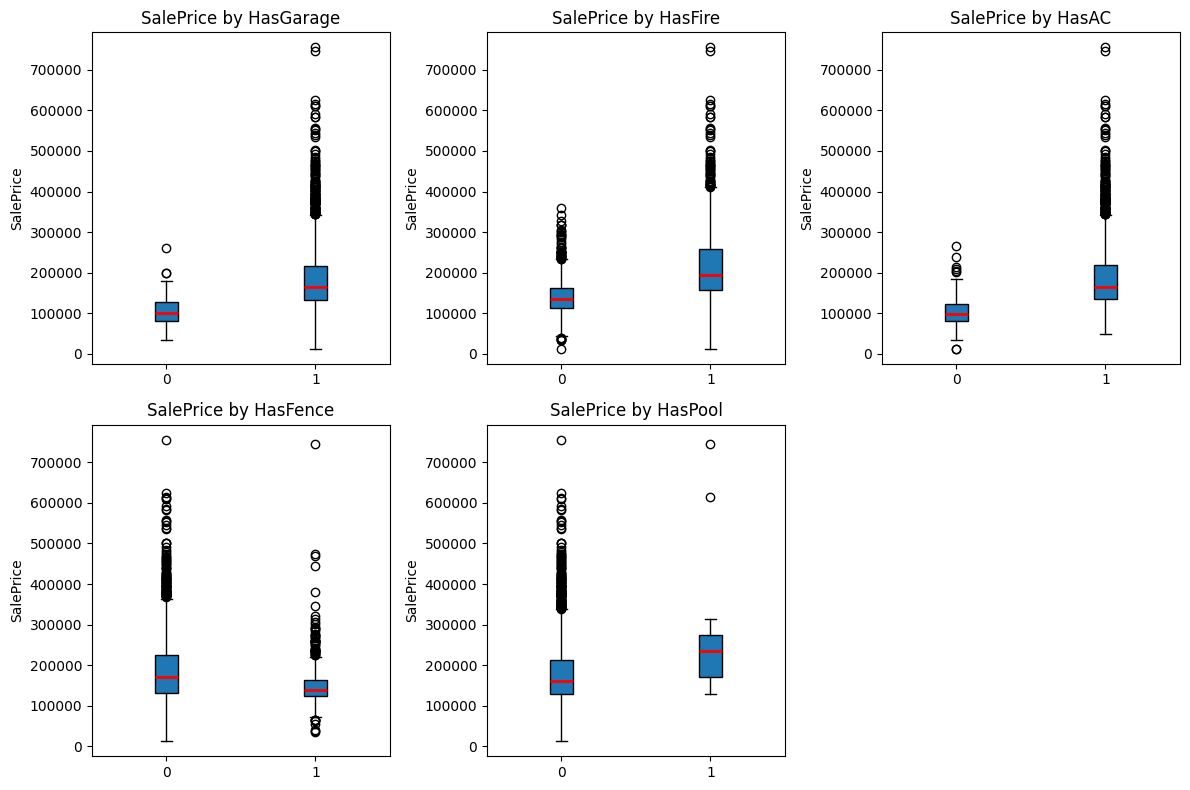

HasGarage: median(0)=100000 | median(1)=165000
HasFire: median(0)=135500 | median(1)=194000
HasAC: median(0)=98250 | median(1)=166000
HasFence: median(0)=171000 | median(1)=140000
HasPool: median(0)=160000 | median(1)=235000


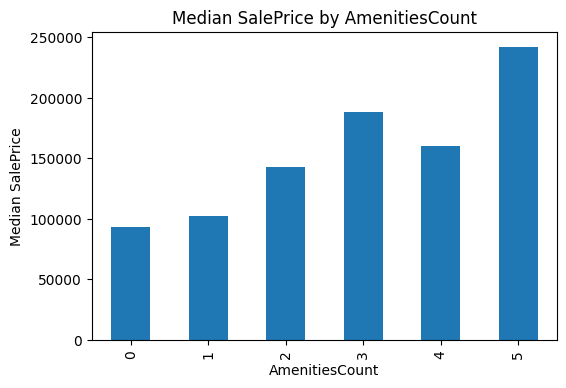

In [193]:
# -------------------------------
# 1️⃣ Creare coloane binare pentru amenities
# -------------------------------
df['HasPool']   = (df['Pool Area'] > 0).astype(int)
df['HasFire']   = (df['Fireplaces'] > 0).astype(int)
df['HasAC']     = (df['Central Air'] == 'Y').astype(int)
df['HasFence']  = (df['Fence'] != 'NoFence').astype(int)
df['HasGarage'] = (df['Garage Cars'].fillna(0) > 0).astype(int)

# total count de amenități (câte are casa)
df['AmenitiesCount'] = df[['HasPool', 'HasFire', 'HasAC', 'HasFence', 'HasGarage']].sum(axis=1)

# -------------------------------
# 2️⃣ Funcție pentru boxploturi comparative
# -------------------------------
def boxplot_binary(feature, ax=None):
    ax = ax or plt.gca()
    ax.boxplot(
        [df.loc[df[feature] == 0, 'SalePrice'],
         df.loc[df[feature] == 1, 'SalePrice']],
        tick_labels=['0', '1'],                       # corect: labels, nu tick_labels
        patch_artist=True,                       # permite colorare
        medianprops=dict(color='red', linewidth=2)
    )
    ax.set_title(f"SalePrice by {feature}")
    ax.set_ylabel("SalePrice")

# -------------------------------
# 3️⃣ Vizualizare boxploturi pentru fiecare amenity
# -------------------------------
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()

for i, feat in enumerate(['HasGarage', 'HasFire', 'HasAC', 'HasFence', 'HasPool']):
    boxplot_binary(feat, axes[i])

axes[-1].axis('off')  # ultimul subplot gol, pentru aspect simetric
plt.tight_layout()
plt.show()

# -------------------------------
# 4️⃣ Mediană per amenity (0 vs 1)
# -------------------------------
for feat in ['HasGarage', 'HasFire', 'HasAC', 'HasFence', 'HasPool']:
    med = df.groupby(feat)['SalePrice'].median()
    print(f"{feat}: median(0)={med.get(0, np.nan):.0f} | median(1)={med.get(1, np.nan):.0f}")

# -------------------------------
# 5️⃣ Relația dintre numărul de amenities și prețul median
# -------------------------------
df.groupby('AmenitiesCount')['SalePrice'].median().plot(
    kind='bar',
    figsize=(6, 4),
    title='Median SalePrice by AmenitiesCount'
)
plt.ylabel("Median SalePrice")
plt.show()


P99 Gr Liv Area: 2872.0
Nr outlieri: 29
     Gr Liv Area  SalePrice
15          3279     538000
65          3238     410000
160         2978     242000
253         3222     320000
422         3140     485000


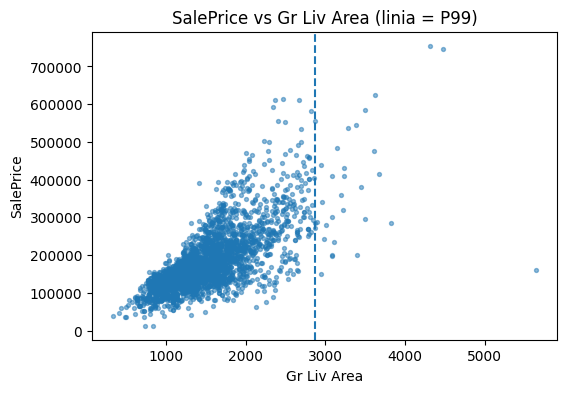

In [178]:
q99_gr = df['Gr Liv Area'].quantile(0.99)
mask_out = df['Gr Liv Area'] > q99_gr
print("P99 Gr Liv Area:", q99_gr)
print("Nr outlieri:", mask_out.sum())
print(df.loc[mask_out, ['Gr Liv Area','SalePrice']].head())

# plot simplu
plt.figure(figsize=(6,4))
plt.scatter(df['Gr Liv Area'], df['SalePrice'], s=8, alpha=0.5)
plt.axvline(q99_gr, linestyle='--')
plt.title("SalePrice vs Gr Liv Area (linia = P99)")
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice")
plt.show()

In [194]:
near_constant = []
for c in df.columns:
    vc = df[c].value_counts(dropna=False, normalize=True)
    if len(vc) and vc.iloc[0] >= 0.95:
        near_constant.append((c, float(vc.iloc[0]), vc.index[0]))
for c,p,val in sorted(near_constant, key=lambda x: -x[1]):
    print(f"{c:20s} {p:5.1%} -> '{val}'")


Fix_Garage           99.9% -> '0'
Utilities            99.9% -> 'AllPub'
Fix_BsmtExposure     99.9% -> '0'
Street               99.6% -> 'Pave'
Pool Area            99.6% -> '0'
Pool QC              99.6% -> 'NoPool'
HasPool              99.6% -> '0'
Condition 2          99.0% -> 'Norm'
is_high_price        99.0% -> '0'
is_big_house         98.9% -> '0'
3Ssn Porch           98.7% -> '0'
Low Qual Fin SF      98.6% -> '0'
Roof Matl            98.5% -> 'CompShg'
Heating              98.5% -> 'GasA'
Misc Val             96.5% -> '0'
Misc Feature         96.4% -> 'NoFeature'
Kitchen AbvGr        95.4% -> '1'
Land Slope           95.2% -> 'Gtl'


In [195]:
to_drop = [
    # identificatori
    'PID','Order',
    # aproape-constante
    'Utilities','Street','Condition 2','Roof Matl','Heating',
    # rare/lipsă masivă – prefer binare separate
    'Pool QC','Misc Feature',
    # redundanță
    'Garage Cond',
    # opțional:
    # 'Functional',
    # flaguri de audit/derivate (dacă nu vrei să intre în model):
    'Fix_Garage','Fix_BsmtExposure','is_high_price','is_big_house'
]

# păstrează doar ce există efectiv în dataframe
drop_cols = [c for c in to_drop if c in df.columns]
print("Dropping:", drop_cols)

df = df.drop(columns=drop_cols).copy()
print("Shape after drop:", df.shape)

# sanity: verifică dacă n-ai eliminat fără să vrei semnale cheie
must_keep = ['SalePrice','Gr Liv Area','Overall Qual','Neighborhood']
missing_keep = [c for c in must_keep if c not in df.columns]
print("Still have key cols? Missing:", missing_keep)

# (opțional) verifică încă 3 aproape-constante ca să nu rămână gunoi:
near_const = []
for c in df.columns:
    vc = df[c].value_counts(dropna=False, normalize=True)
    if len(vc) and vc.iloc[0] >= 0.99:
        near_const.append((c, float(vc.iloc[0]), vc.index[0]))
print("Near-constant left (>=99% same):", near_const[:10])


Dropping: ['PID', 'Order', 'Utilities', 'Street', 'Condition 2', 'Roof Matl', 'Heating', 'Pool QC', 'Misc Feature', 'Garage Cond', 'Fix_Garage', 'Fix_BsmtExposure', 'is_high_price', 'is_big_house']
Shape after drop: (2925, 81)
Still have key cols? Missing: []
Near-constant left (>=99% same): [('Pool Area', 0.9955555555555555, np.int64(0)), ('HasPool', 0.9955555555555555, np.int64(0))]


In [197]:
import numpy as np
import pandas as pd

# -------------------------------
# 1. Imputare Lot Frontage după Neighborhood (logic în contextul imobiliar)
# -------------------------------
if 'Lot Frontage' in df.columns and 'Neighborhood' in df.columns:
    global_med = df['Lot Frontage'].median()  # fallback global
    # mediană per Neighborhood
    df['LotFrontage_med_neigh'] = df.groupby('Neighborhood')['Lot Frontage'].transform('median')
    # completare lipsuri cu mediană pe Neighborhood, apoi cu mediană globală
    df['Lot Frontage'] = df['Lot Frontage'].fillna(df['LotFrontage_med_neigh']).fillna(global_med)
    df.drop(columns=['LotFrontage_med_neigh'], inplace=True)

# -------------------------------
# 2. Imputare numerică generală (doar pentru coloane sigure)
# -------------------------------
# Liste de coloane unde NaN = „nu există” (de completat cu 0 + indicator)
existence_na = [
    'Garage Yr Blt', 'Garage Area', 'Garage Cars',
    'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
    'Bsmt Full Bath', 'Bsmt Half Bath', 'Pool Area', 'Mas Vnr Area'
]

for col in existence_na:
    if col in df.columns:
        flag_col = f'{col}_was_missing'
        df[flag_col] = df[col].isna().astype(int)  # indicator binar
        df[col] = df[col].fillna(0)

# Acum, pentru numericile rămase cu NaN (măsurare lipsă reală), folosim mediană globală
for c in df.select_dtypes(include=[np.number]).columns:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].median())


In [198]:
# completări semantice înainte de mapare
fill_semantic = {
    'Bsmt Qual': 'NA', 'Bsmt Cond': 'NA', 'Bsmt Exposure': 'NA',
    'BsmtFin Type 1': 'NA', 'BsmtFin Type 2': 'NA',
    'Fireplace Qu': 'NA', 'Garage Qual': 'NA', 'Garage Finish': 'NA',
    'Garage Type': 'NA', 'Pool QC': 'NA', 'Fence': 'NA'
}
for col, val in fill_semantic.items():
    if col in df.columns:
        df[col] = df[col].fillna(val)

ord_maps = {
    'Exter Qual':    {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'Exter Cond':    {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'Bsmt Qual':     {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'Bsmt Cond':     {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'HeatingQC':     {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},  # NOTĂ: numele tău e "HeatingQC"
    'KitchenQual':   {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'FireplaceQu':   {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'Garage Qual':   {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'Garage Finish': {'NA':0,'Unf':1,'RFn':2,'Fin':3},
    'Bsmt Exposure': {'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4},
    'Paved Drive':   {'N':0,'P':1,'Y':2},
    'Lot Shape':     {'IR3':1,'IR2':2,'IR1':3,'Reg':4},
    # Electrical ca ORDINAL (în logica fișei tale):
    'Electrical':    {'SBrkr':5,'FuseA':4,'Mix':3,'FuseF':2,'FuseP':1}
    # Dacă păstrezi Functional:
    # 'Functional':  {'Sal':1,'Sev':2,'Maj2':3,'Maj1':4,'Mod':5,'Min2':6,'Min1':7,'Typ':8}
}
for col, mp in ord_maps.items():
    if col in df.columns:
        df[col] = df[col].map(mp).astype(float)


In [203]:
drop_cols = [c for c in ['Order','PID','Utilities','Street','Condition 2','Roof Matl','Heating',
                         'Pool QC','Alley','Misc Feature','Garage Cond','Functional'] if c in df.columns]

X = df.drop(columns=[c for c in drop_cols if c in df.columns])

# nominale pentru OHE (după ce ai mapat ordinale)
ohe_cols = [c for c in [
    'MS SubClass','MS Zoning','Land Contour','Lot Config','Neighborhood',
    'Condition 1','Bldg Type','House Style','Roof Style',
    'Exterior 1','Exterior 2','Mas Vnr Type','Foundation',
    'Heating', 'Central Air','Garage Type','Sale Type','Sale Condition'
] if c in X.columns]

# numeric = restul numerice (inclusiv ordinale mapate)
num_cols = X.select_dtypes(include=['number']).columns.tolist()
# scoate din num_cols ținta și orice coloane care nu trebuie scalate (dacă folosești ținta separat)


In [199]:
skew_cols = ['Lot Area','Gr Liv Area','Total Bsmt SF','1st Flr SF','Garage Area']
for c in skew_cols:
    if c in df.columns:
        df[f'log_{c}'] = np.log1p(df[c].clip(lower=0))


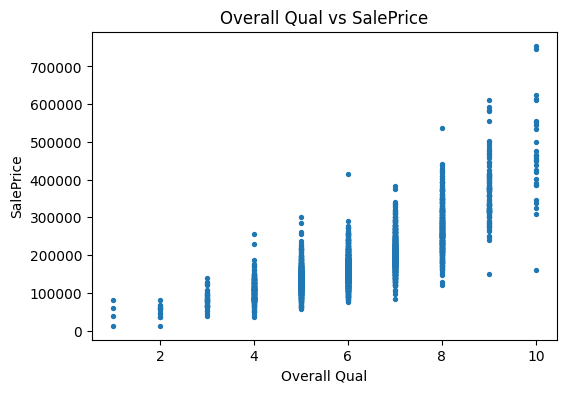

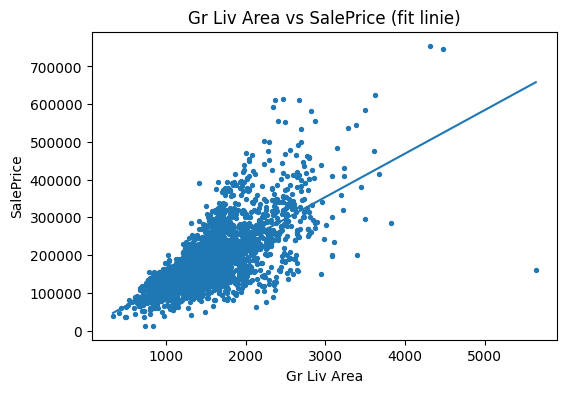

In [202]:
# Overall Qual vs SalePrice
plt.figure(figsize=(6,4))
plt.scatter(df['Overall Qual'], df['SalePrice'], s=8)
plt.title("Overall Qual vs SalePrice"); plt.xlabel("Overall Qual"); plt.ylabel("SalePrice"); plt.show()

# Gr Liv Area vs SalePrice (cu fit linie)
x = df['Gr Liv Area'].values.astype(float); y = df['SalePrice'].values.astype(float)
a,b = np.polyfit(x,y,1)
plt.figure(figsize=(6,4)); plt.scatter(x,y,s=8); xs = np.linspace(x.min(), x.max(), 100)
plt.plot(xs, a*xs+b); plt.title("Gr Liv Area vs SalePrice (fit linie)")
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice"); plt.show()


P99 GrLivArea = 2872.0 | nr. big houses: 31


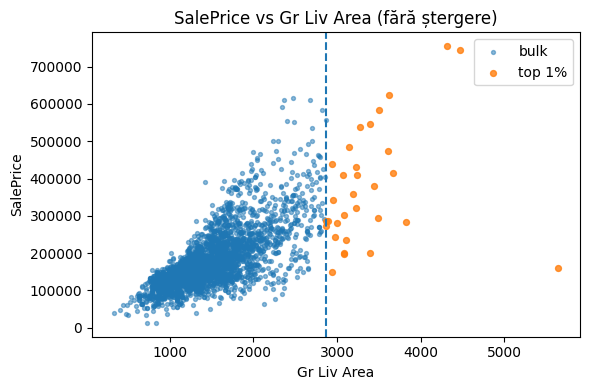

In [179]:
p99 = df['Gr Liv Area'].quantile(0.99)
df['GrLivArea_log'] = np.log1p(df['Gr Liv Area'])
df['SalePrice_log'] = np.log1p(df['SalePrice'])   # util la modele liniare
df['is_big_house'] = (df['Gr Liv Area'] >= p99).astype(int)
print("P99 GrLivArea =", p99, "| nr. big houses:", df['is_big_house'].sum())

bulk = df['Gr Liv Area'] < p99
plt.figure(figsize=(6,4))
plt.scatter(df.loc[bulk,'Gr Liv Area'], df.loc[bulk,'SalePrice'], s=8, alpha=0.5, label='bulk')
plt.scatter(df.loc[~bulk,'Gr Liv Area'], df.loc[~bulk,'SalePrice'], s=18, alpha=0.8, label='top 1%')
plt.axvline(p99, ls='--')
plt.title("SalePrice vs Gr Liv Area (fără ștergere)")
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice"); plt.legend()
plt.tight_layout(); plt.show()

In [186]:
# 1) Prag outlier (P99) pe SalePrice
p99_sp = df['SalePrice'].quantile(0.99)
mask_hp = df['SalePrice'] > p99_sp

print("P99 SalePrice:", p99_sp)
print("Nr outlieri (SalePrice):", mask_hp.sum())
print(df.loc[mask_hp, ['SalePrice','Gr Liv Area']].head())


P99 SalePrice: 456783.71999999945
Nr outlieri (SalePrice): 30
     SalePrice  Gr Liv Area
15      538000         3279
44      611657         2364
46      500000         2696
366     501837         2234
421     462000         2772


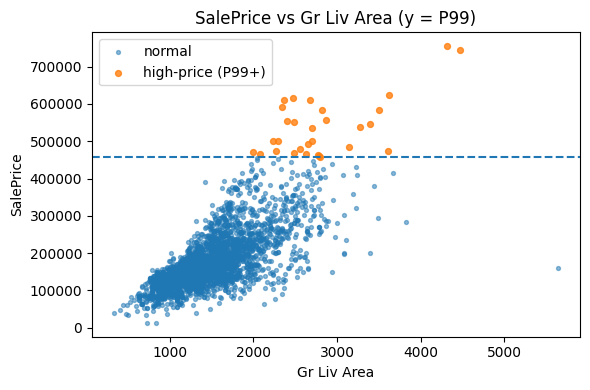

In [187]:
# 2) Plot simplu: Gr Liv Area vs SalePrice, outlierele colorate diferit + linie orizontală la P99
plt.figure(figsize=(6,4))
plt.scatter(df.loc[~mask_hp, 'Gr Liv Area'], df.loc[~mask_hp, 'SalePrice'], s=8, alpha=0.5, label='normal')
plt.scatter(df.loc[mask_hp, 'Gr Liv Area'], df.loc[mask_hp, 'SalePrice'], s=18, alpha=0.8, label='high-price (P99+)')
plt.axhline(p99_sp, linestyle='--')
plt.title("SalePrice vs Gr Liv Area (y = P99)")
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice")
plt.legend()
plt.tight_layout(); plt.show()

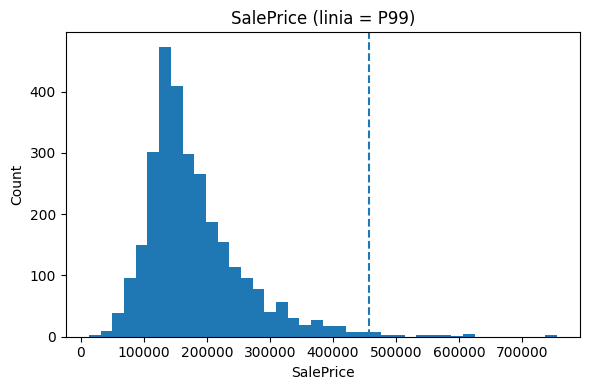

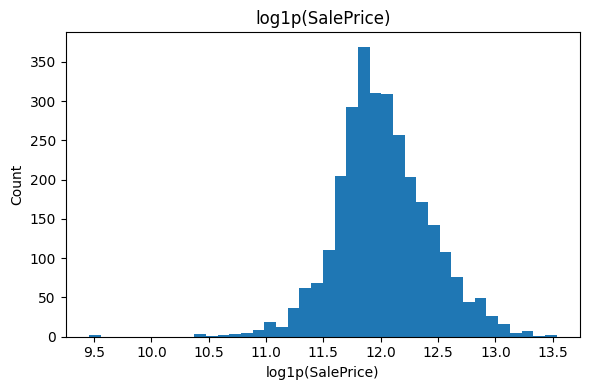

In [184]:
import numpy as np

df['log_SalePrice'] = np.log1p(df['SalePrice'])
df['is_high_price'] = (df['SalePrice'] >= q99_sp).astype(int)

# (opțional) vezi distribuția după log
plt.figure(figsize=(6,4))
plt.hist(df['log_SalePrice'], bins=40)
plt.title("log1p(SalePrice)")
plt.xlabel("log1p(SalePrice)"); plt.ylabel("Count")
plt.tight_layout(); plt.show()